In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs-analysis/ds.salaries.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore') 
from wordcloud import WordCloud, STOPWORDS

In [3]:
df=pd.read_csv('/kaggle/input/data-science-jobs-analysis/ds.salaries.csv')

In [4]:
df

Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Data Engineer   85000             GBP         109024   
3          Product Data Analyst   20000             USD          20000   
4     Machine Learning Engineer  150000             USD         150000   
..                          ...     ...             ...            ...   
602               Data Engineer  154000             USD         154000   
603               Data Engineer  126000             USD         126000   
604                Data Analyst  129000             USD         129000   
605                Data Analyst  150000             USD         150000   
606                AI Scientist  200000             USD         200000   

    employee_residence  remote_ratio company_location company_size  
0                   DE             0               DE            L  
1                   JP             0               JP            S  
2                   GB            50               GB            M  
3                   HN             0               HN            S  
4                   US            50               US            L  
..                 ...           ...              ...          ...  
602                 US           100               US            M  
603                 US           100               US            M  
604                 US             0               US            M  
605                 US           100               US            M  
606                 IN           100               US            L  

[607 rows x 12 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe()

Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

# Distribution by years of work

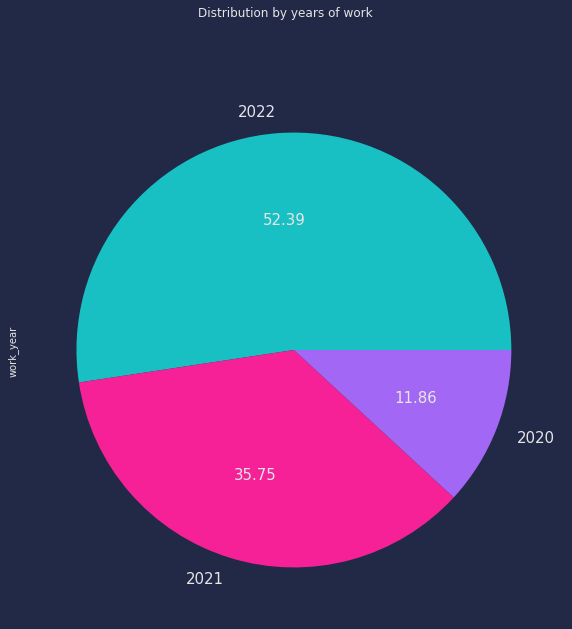

In [8]:
df['work_year'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by years of work', fontsize=15)
plt.show()

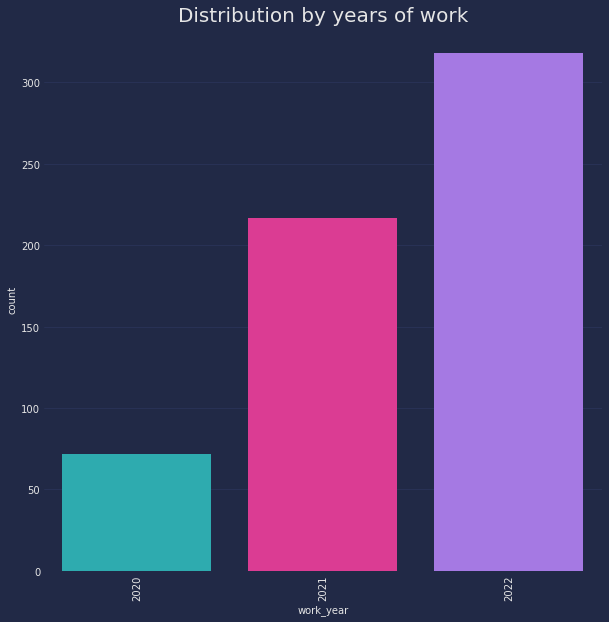

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='work_year')
plt.xticks(rotation=90)
plt.title('Distribution by years of work',fontsize = 20)
plt.show()

In [10]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

# Distribution by experience level

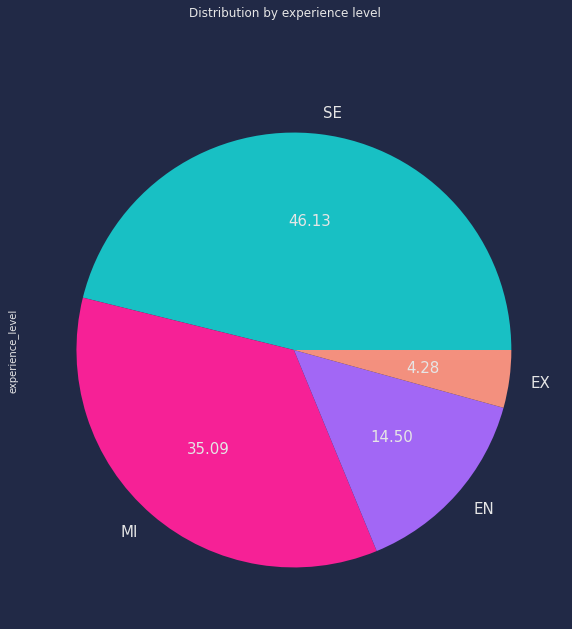

In [11]:
df['experience_level'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by experience level', fontsize=15)
plt.show()

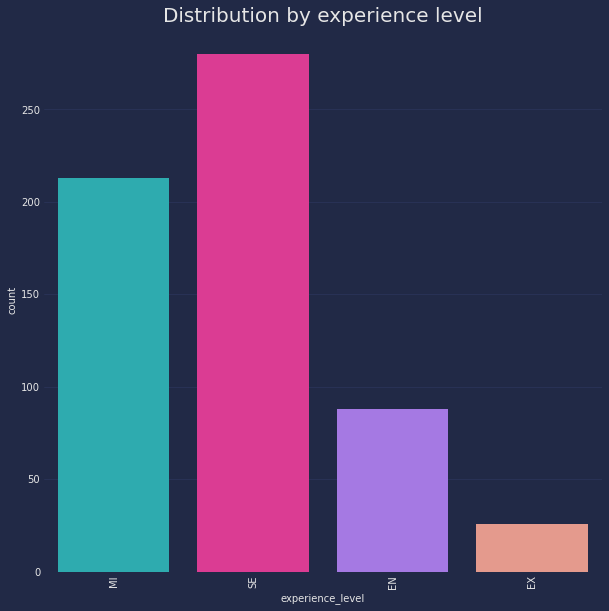

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='experience_level')
plt.xticks(rotation=90)
plt.title('Distribution by experience level',fontsize = 20)
plt.show()

In [13]:
df['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

# Distribution by type of employment

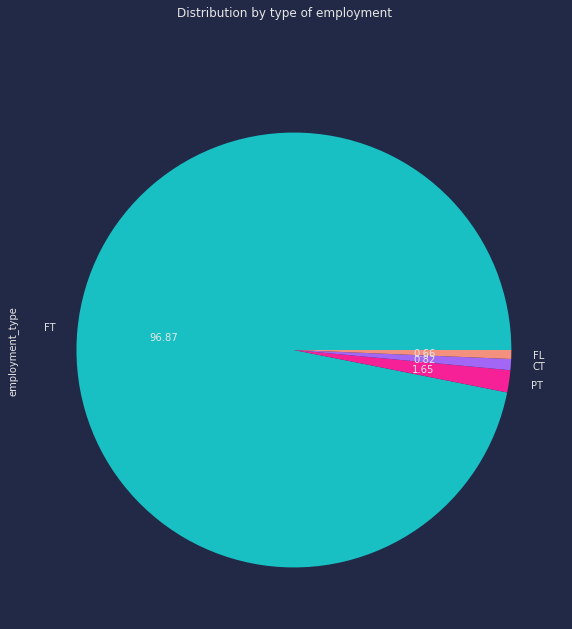

In [14]:
df['employment_type'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by type of employment', fontsize=10)
plt.show()

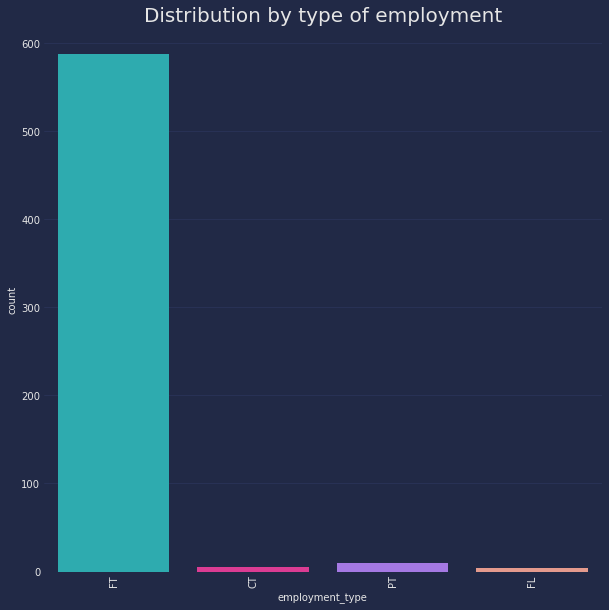

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='employment_type')
plt.xticks(rotation=90)
plt.title('Distribution by type of employment',fontsize = 20)
plt.show()

In [16]:
df['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

# Distribution by job title

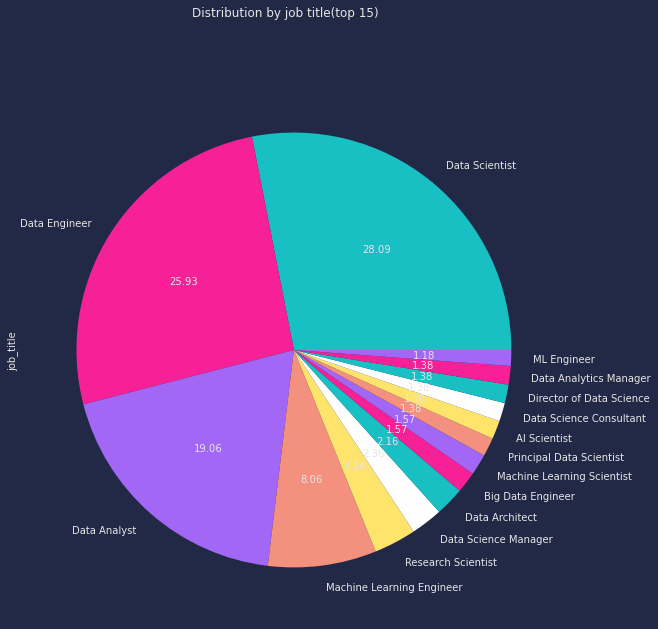

In [17]:
df['job_title'].value_counts().head(15).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by job title(top 15)', fontsize=10)
plt.show()

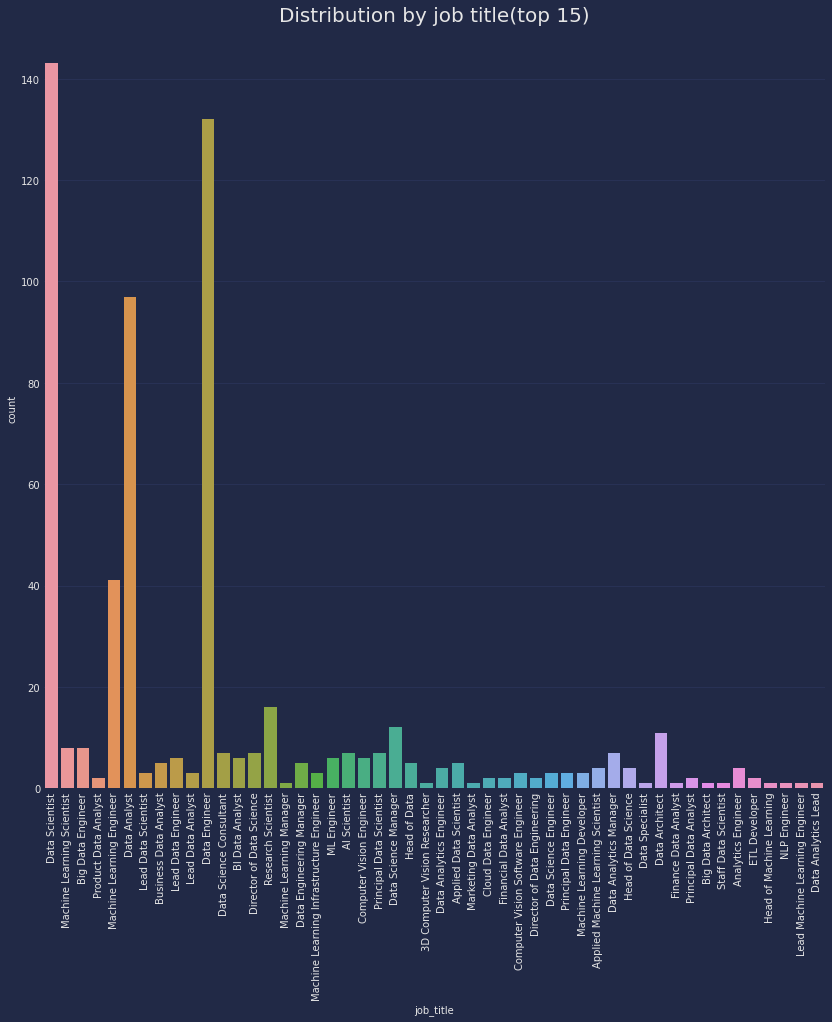

In [18]:
plt.figure(figsize=(14,14))
sns.countplot(data=df,x='job_title')
plt.xticks(rotation=90)
plt.title('Distribution by job title(top 15)',fontsize = 20)
plt.show()

In [19]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

# Distribution by currency type

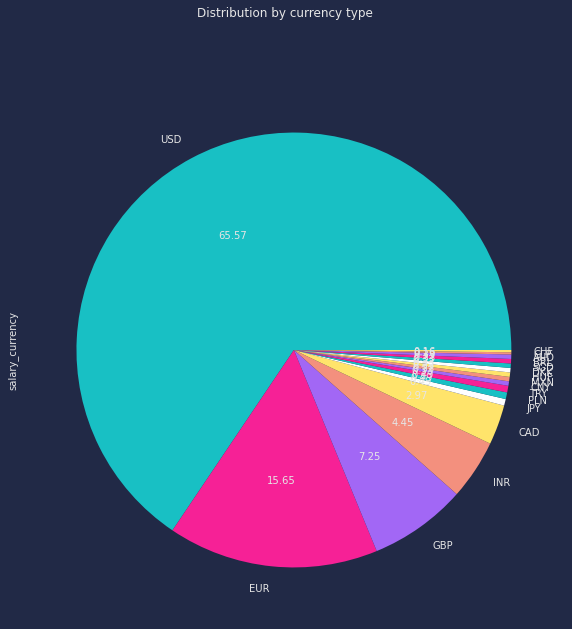

In [20]:
df['salary_currency'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by currency type', fontsize=10)
plt.show()

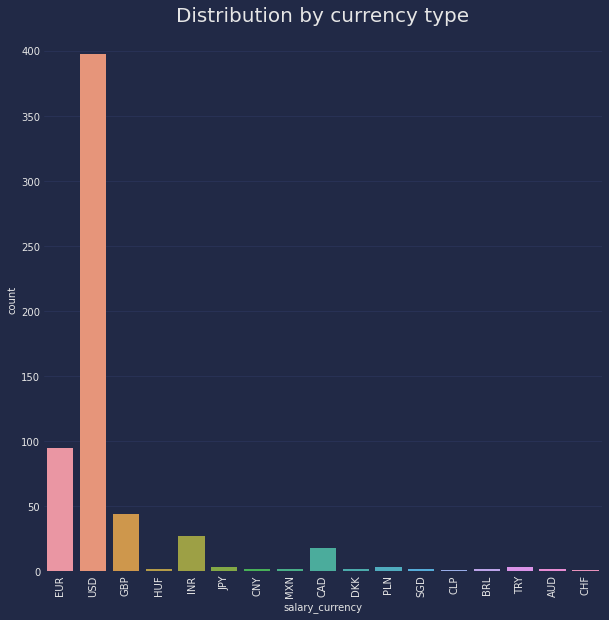

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='salary_currency')
plt.xticks(rotation=90)
plt.title('Distribution by currency type',fontsize = 20)
plt.show()

In [22]:
df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

# Distribution by company size

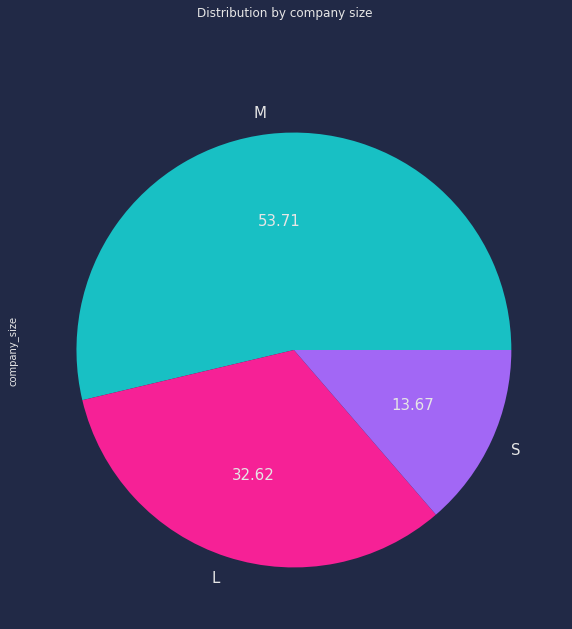

In [23]:
df['company_size'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by company size', fontsize=15)
plt.show()

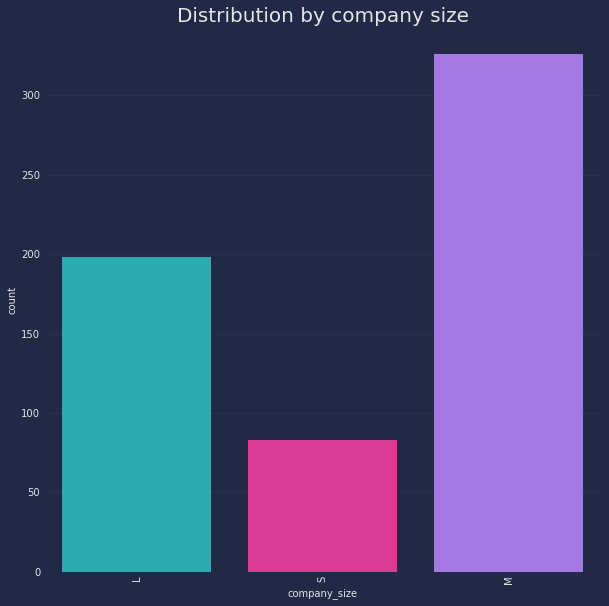

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='company_size')
plt.xticks(rotation=90)
plt.title('Distribution by company size',fontsize = 20)
plt.show()

In [25]:
df['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

# Distribution by remote ratio

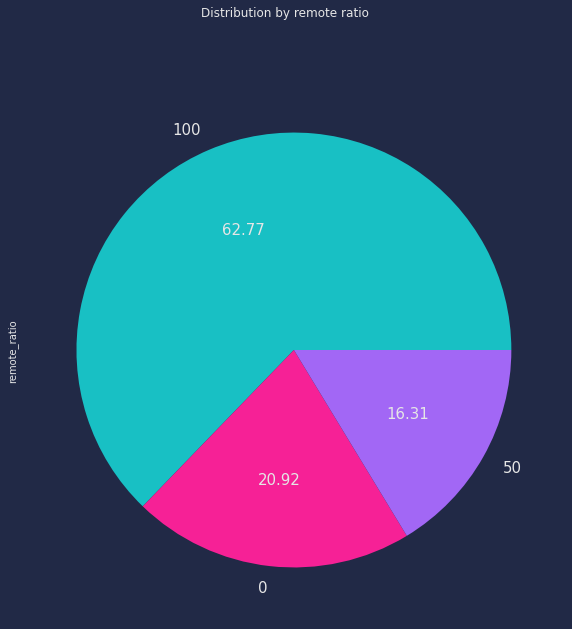

In [26]:
df['remote_ratio'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by remote ratio', fontsize=15)
plt.show()

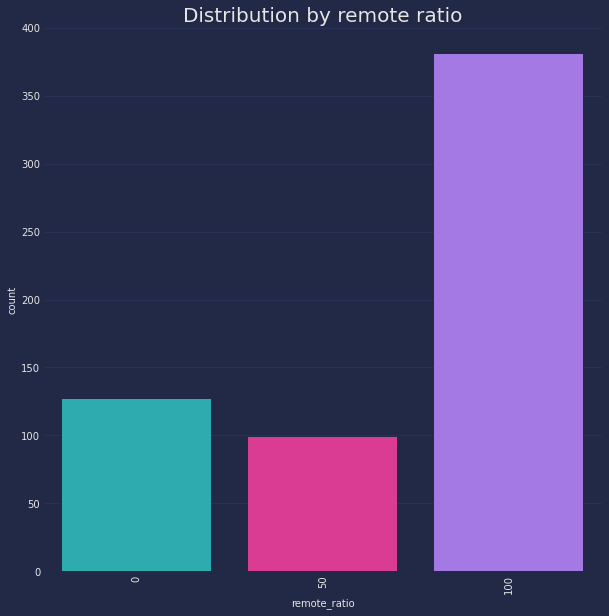

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='remote_ratio')
plt.xticks(rotation=90)
plt.title('Distribution by remote ratio',fontsize = 20)
plt.show()

In [28]:
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

# Distribution of the level of experience and type of employment relative to the year of work

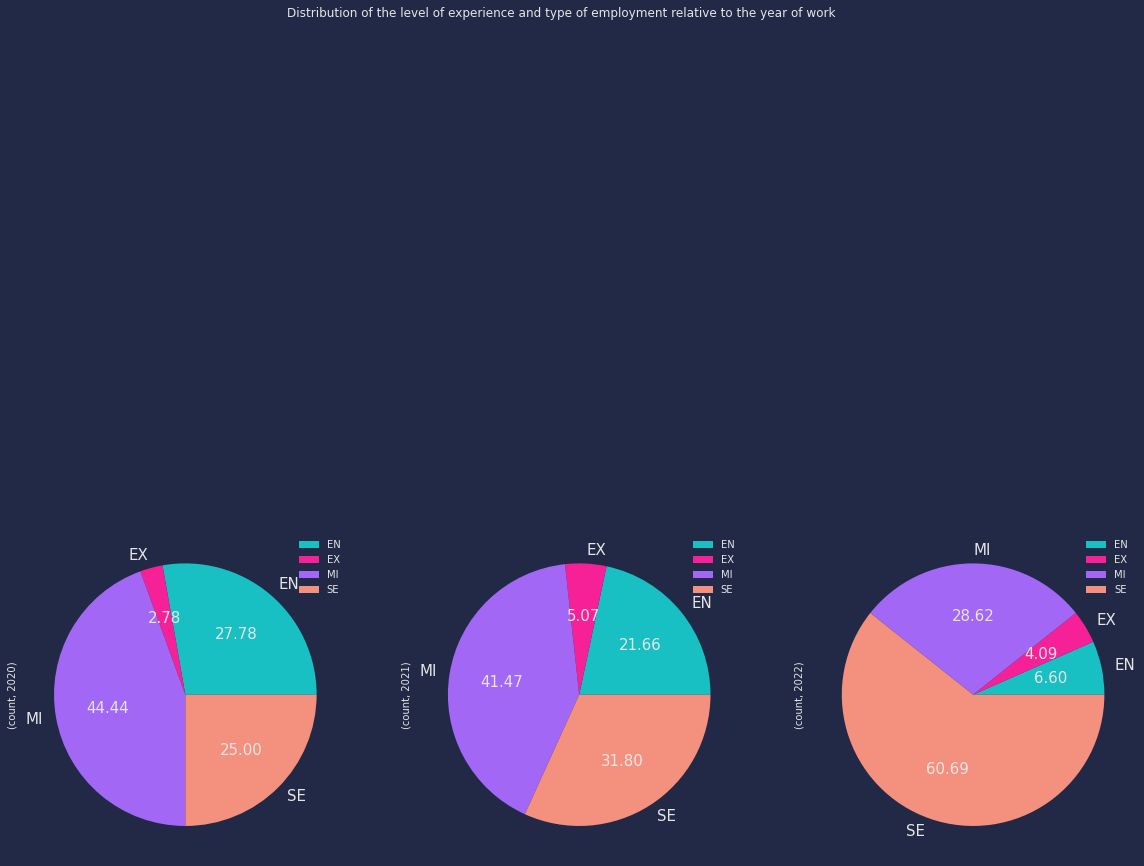

In [29]:
df.pivot_table(index='experience_level', columns='work_year', values='employment_type', aggfunc=['count', 'mean']).plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(20,20), title='Distribution of the level of experience and type of employment relative to the year of work', fontsize=15)
plt.show()

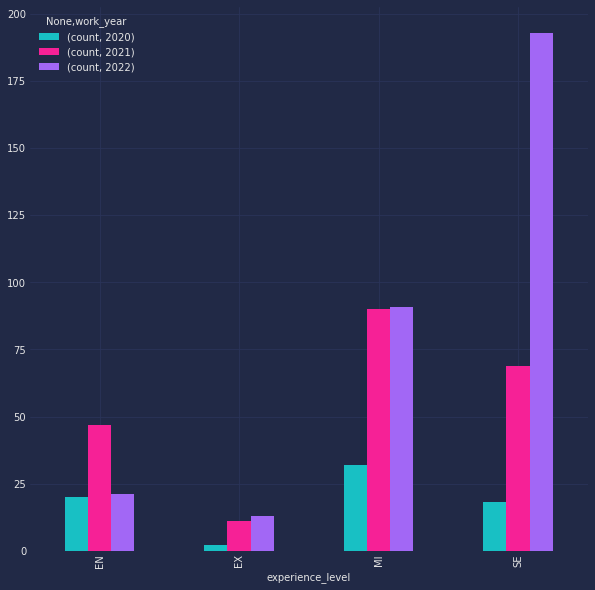

In [30]:
df.pivot_table(index='experience_level', columns='work_year', values='employment_type', aggfunc=['count']).plot(kind='bar', figsize=(10,10))
plt.show()

In [31]:
df.pivot_table(index='experience_level', columns='work_year', values='employment_type', aggfunc=['count'])

count          
work_year         2020 2021 2022
experience_level                
EN                  20   47   21
EX                   2   11   13
MI                  32   90   91
SE                  18   69  193

# Distribution of the average salary value in $ relative to the level of experience

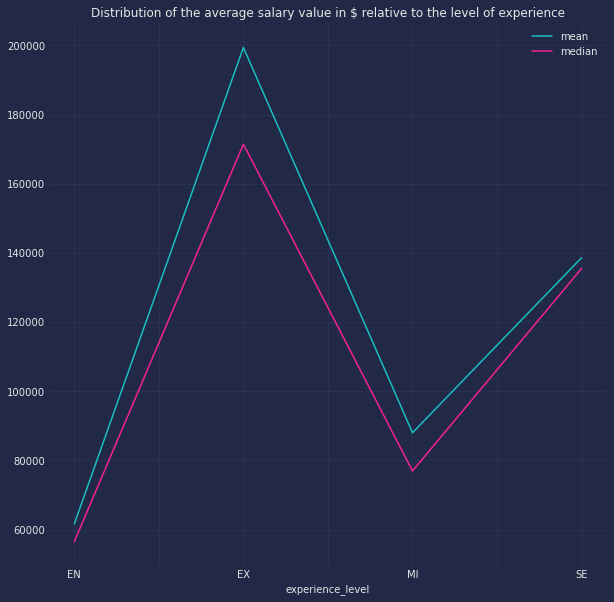

In [32]:
df.groupby('experience_level')['salary_in_usd'].agg(['mean','median']).plot(kind='line', figsize=(10,10), title=('Distribution of the average salary value in $ relative to the level of experience'))
plt.show()

In [33]:
df.groupby('experience_level')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)

mean    median
experience_level                         
EX                199392.038462  171437.5
SE                138617.292857  135500.0
MI                 87996.056338   76940.0
EN                 61643.318182   56500.0

# Distribution of the average salary value in $ relative to the year of work

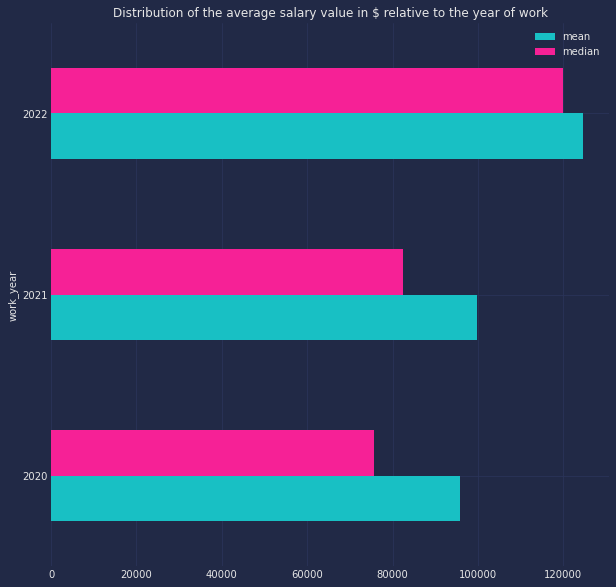

In [34]:
df.groupby('work_year')['salary_in_usd'].agg(['mean','median']).plot(kind='barh', figsize=(10,10), title=('Distribution of the average salary value in $ relative to the year of work'))
plt.show()

In [35]:
df.groupby('work_year')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)

mean    median
work_year                         
2022       124522.006289  120000.0
2021        99853.792627   82528.0
2020        95813.000000   75544.0

# Distribution of the average salary value in $ relative to the employee's place of residence

In [36]:
fig = px.box(df, x='employee_residence', color='employee_residence', y='salary_in_usd', title= "Distribution of the average salary value in $ relative to the employee's place of residence", width=1200, height=600,template='plotly_dark')
fig.show()

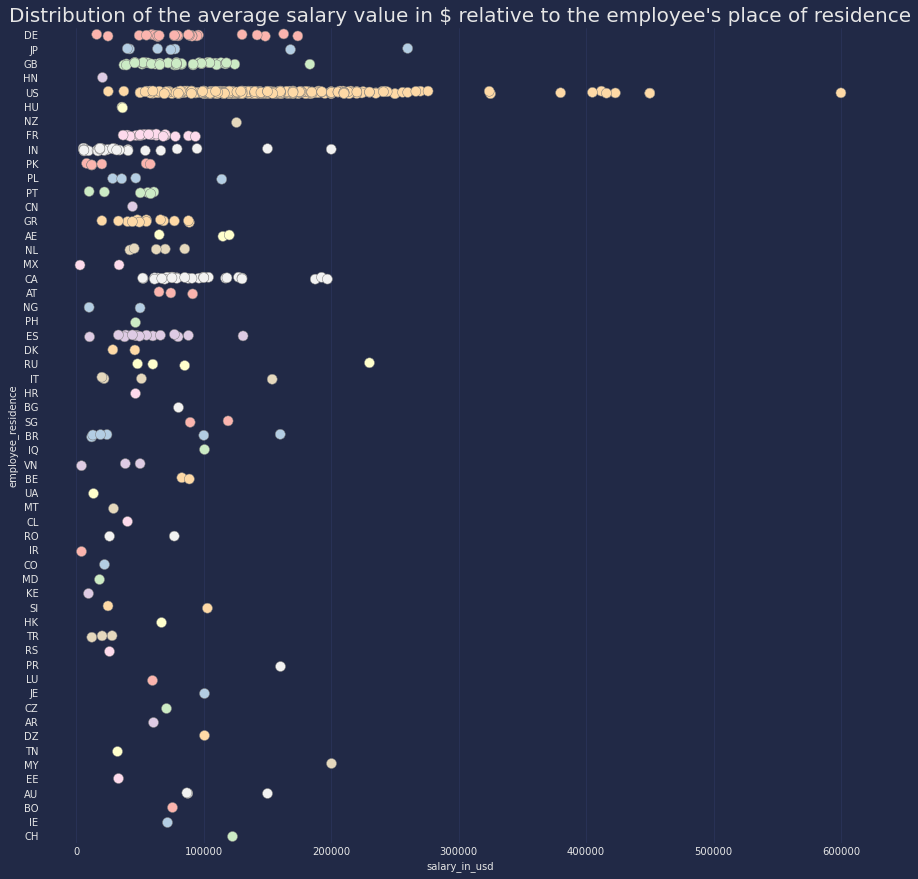

In [37]:
plt.subplots(figsize=(15,15))
sns.stripplot(y='employee_residence', x='salary_in_usd', data=df, palette='Pastel1', s=10, marker='o', linewidth=0.5, alpha=1)
plt.title("Distribution of the average salary value in $ relative to the employee's place of residence",fontsize = 20)
plt.show()

In [38]:
df.groupby('employee_residence')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)

mean    median
employee_residence                         
MY                  200000.000000  200000.0
PR                  160000.000000  160000.0
US                  149194.117470  138475.0
NZ                  125000.000000  125000.0
CH                  122346.000000  122346.0
AU                  108042.666667   87425.0
RU                  105750.000000   72500.0
SG                  104176.500000  104176.5
JP                  103537.714286   74000.0
AE                  100000.000000  115000.0
DZ                  100000.000000  100000.0
JE                  100000.000000  100000.0
IQ                  100000.000000  100000.0
CA                   97085.310345   85000.0
BE                   85699.000000   85699.0
DE                   85552.560000   79197.0
GB                   81403.159091   78526.0
BG                   80000.000000   80000.0
AT                   76738.666667   74130.0
BO                   75000.000000   75000.0
IE                   71444.000000   71444.0
CZ                   69999.000000   69999.0
HK                   66022.000000   66022.0
SI                   63831.000000   63831.0
IT                   61600.000000   36366.5
NL                   60956.600000   62651.0
AR                   60000.000000   60000.0
FR                   59886.611111   57920.0
LU                   59102.000000   59102.0
ES                   57593.400000   49461.0
GR                   56331.230769   54957.0
PL                   56177.500000   41093.5
BR                   54634.666667   21453.5
RO                   51419.000000   51419.0
PH                   45760.000000   45760.0
HR                   45618.000000   45618.0
CN                   43331.000000   43331.0
PT                   42862.500000   53090.0
CL                   40038.000000   40038.0
IN                   37322.333333   22124.0
DK                   37252.500000   37252.5
HU                   35997.000000   35997.0
EE                   32974.000000   32974.0
TN                   31875.000000   31875.0
VN                   30800.000000   38400.0
NG                   30000.000000   30000.0
MT                   28369.000000   28369.0
PK                   27462.833333   16000.0
RS                   25532.000000   25532.0
CO                   21844.000000   21844.0
TR                   20096.666667   20171.0
HN                   20000.000000   20000.0
MX                   18185.000000   18185.0
MD                   18000.000000   18000.0
UA                   13400.000000   13400.0
KE                    9272.000000    9272.0
IR                    4000.000000    4000.0

# Distribution of the average salary value in $ relative to the location of the company

In [39]:
fig = px.box(df, x='company_location', color='company_location', y='salary_in_usd', title= 'Distribution of the average salary value in $ relative to the location of the company', width=1200, height=600,template='plotly_dark')
fig.show()

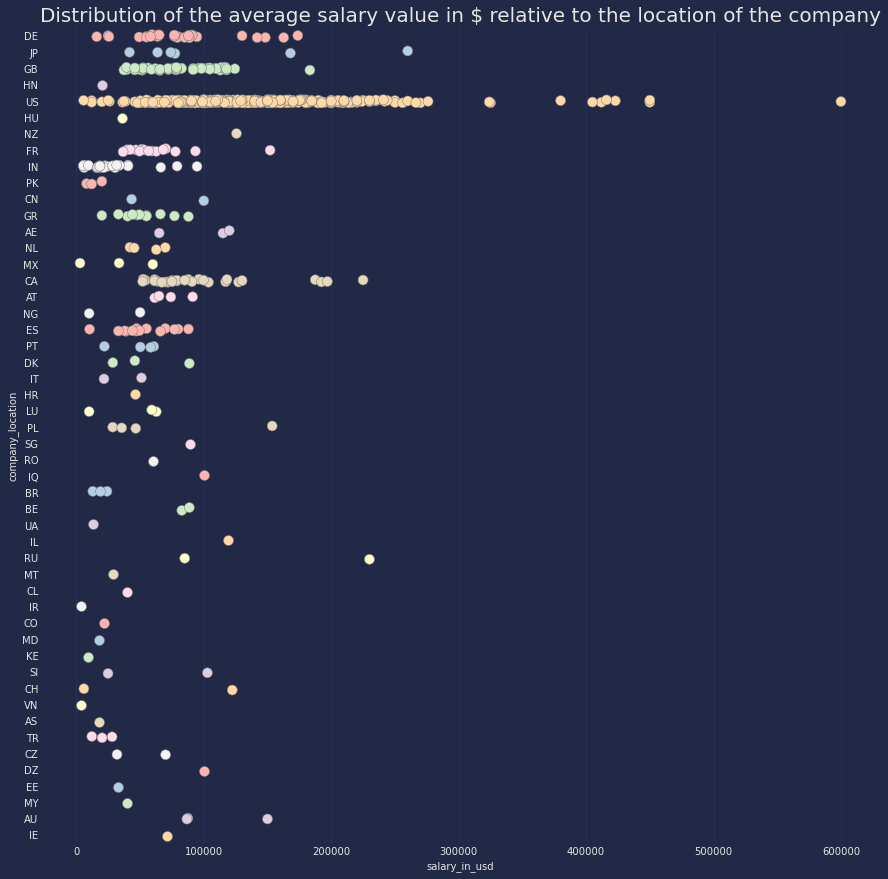

In [40]:
plt.subplots(figsize=(15,15))
sns.stripplot(y='company_location', x='salary_in_usd', data=df, palette='Pastel1', s=10, marker='o', linewidth=0.5, alpha=1)
plt.title('Distribution of the average salary value in $ relative to the location of the company',fontsize = 20)
plt.show()

In [41]:
df.groupby('company_location')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)

mean    median
company_location                         
RU                157500.000000  157500.0
US                144055.261972  135000.0
NZ                125000.000000  125000.0
IL                119059.000000  119059.0
JP                114127.333333   75682.0
AU                108042.666667   87425.0
AE                100000.000000  115000.0
DZ                100000.000000  100000.0
IQ                100000.000000  100000.0
CA                 99823.733333   81895.5
SG                 89294.000000   89294.0
BE                 85699.000000   85699.0
DE                 81887.214286   78015.0
GB                 81583.042553   78526.0
AT                 72920.750000   69489.5
CN                 71665.500000   71665.5
IE                 71444.000000   71444.0
PL                 66082.500000   41093.5
CH                 64114.000000   64114.0
FR                 63970.666667   56738.0
SI                 63831.000000   63831.0
RO                 60000.000000   60000.0
NL                 54945.750000   54021.0
DK                 54386.333333   45896.0
ES                 53060.142857   48371.5
GR                 52293.090909   49461.0
CZ                 50937.000000   50937.0
PT                 47793.750000   54217.5
HR                 45618.000000   45618.0
LU                 43942.666667   59102.0
CL                 40038.000000   40038.0
MY                 40000.000000   40000.0
IT                 36366.500000   36366.5
HU                 35735.000000   35735.0
EE                 32974.000000   32974.0
MX                 32123.333333   33511.0
NG                 30000.000000   30000.0
IN                 28581.750000   22124.0
MT                 28369.000000   28369.0
CO                 21844.000000   21844.0
TR                 20096.666667   20171.0
HN                 20000.000000   20000.0
BR                 18602.666667   18907.0
AS                 18053.000000   18053.0
MD                 18000.000000   18000.0
UA                 13400.000000   13400.0
PK                 13333.333333   12000.0
KE                  9272.000000    9272.0
IR                  4000.000000    4000.0
VN                  4000.000000    4000.0

# Distribution of the average salary value in $ relative to the size of the company

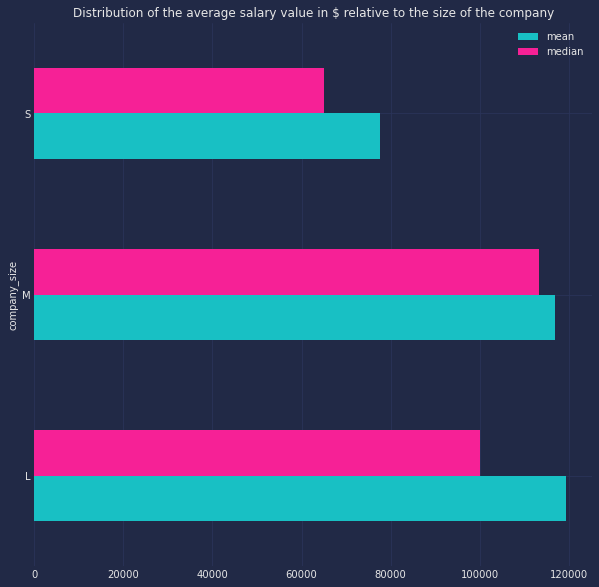

In [42]:
df.groupby('company_size')['salary_in_usd'].agg(['mean','median']).plot(kind='barh', figsize=(10,10), title=('Distribution of the average salary value in $ relative to the size of the company'))
plt.show()

In [43]:
df.groupby('company_size')['salary_in_usd'].agg(['mean','median']).sort_values(by='mean',ascending=False)

mean    median
company_size                         
L             119242.994949  100000.0
M             116905.466258  113188.0
S              77632.674699   65000.0

# Distribution of companies of different sizes relative to the level of experience and year of work

In [44]:
fig = px.box(df, x='company_size', color='work_year', y='experience_level', title= 'Distribution of companies of different sizes relative to the level of experience and year of work', width=1200, height=600,template='plotly_dark')
fig.show()

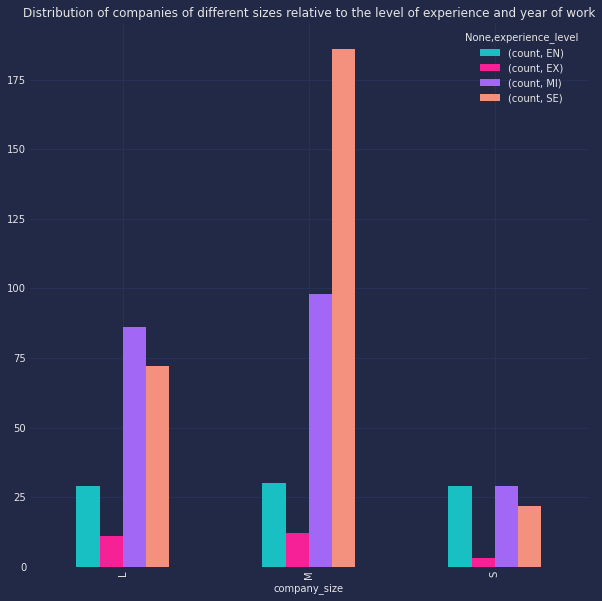

In [45]:
df.pivot_table(index='company_size', columns='experience_level', values='work_year', aggfunc=['count']).plot(kind='bar', figsize=(10,10), title=('Distribution of companies of different sizes relative to the level of experience and year of work'))
plt.show()

In [46]:
df.pivot_table(index='company_size', columns='experience_level', values='work_year', aggfunc=['count'])

count             
experience_level    EN  EX  MI   SE
company_size                       
L                   29  11  86   72
M                   30  12  98  186
S                   29   3  29   22

# Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!